## Exercise 10: Explore Phase-Shift Gates
1. Create a 1-qubit quantum circuit.
2. Apply the S (Phase) gate, T gate, and a Rz rotation with an arbitrary angle (e.g., π/4) to the qubit.
3. Visualize the state vector after each gate and explain how the phase shift affects the qubit.

In [24]:
from qiskit import *
from qiskit.primitives import StatevectorSampler  # simulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from numpy import sqrt
import numpy as np
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

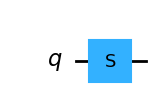

In [25]:
qc = QuantumCircuit(1)

qc.s(0)
qc.draw('mpl')

Initial State Vector (in LaTeX notation): 


<IPython.core.display.Latex object>


Initial State Vector (on Q-sphere Sphere):


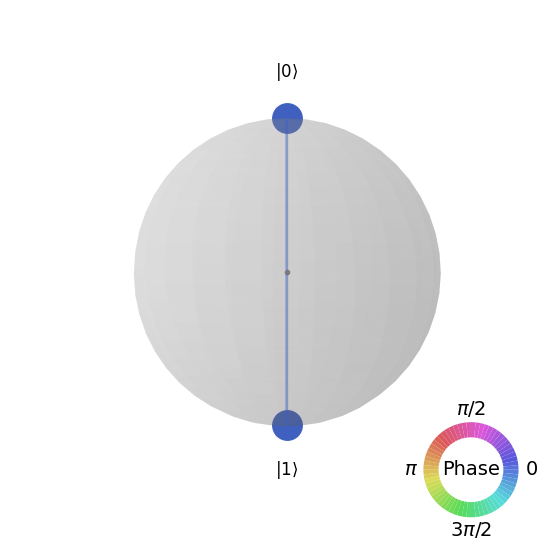


Initial State Vector (on Bloch Sphere):  


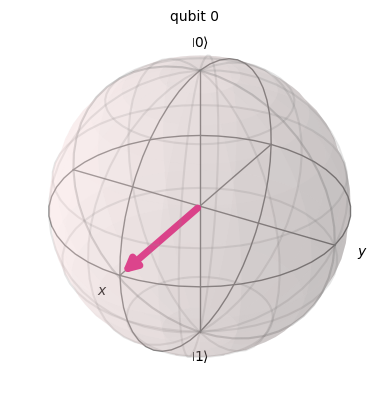

In [26]:
u_init = Statevector([1/sqrt(2), 1/sqrt(2)])
print("\033[1mInitial State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_init.draw('latex'))

print("\n\033[1mInitial State Vector (on Q-sphere Sphere):\033[0m".ljust(50))
display(u_init.draw('qsphere'))

print("\n\033[1mInitial State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_init.draw('bloch'))


Resulting State Vector after S gate(in LaTeX notation):


<IPython.core.display.Latex object>


Resulting State Vector after S gate(on Q-Sphere):


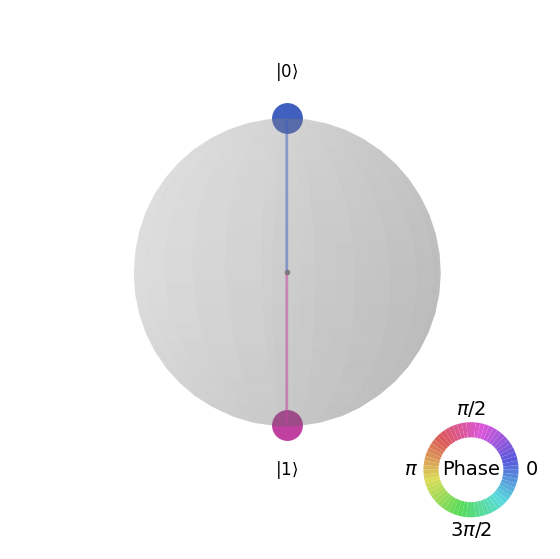


Resulting State Vector after S gate(on Bloch Sphere):


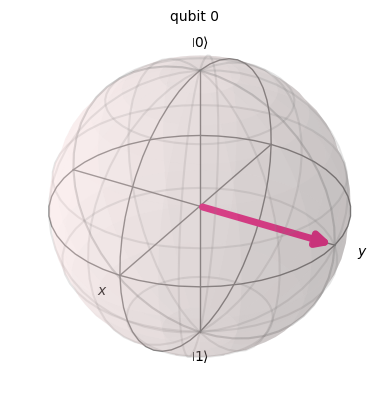

In [27]:
u_final = u_init.evolve(qc)
print("\n\033[1mResulting State Vector after S gate(in LaTeX notation):\033[0m".ljust(50))
display(u_final.draw('latex'))

print("\n\033[1mResulting State Vector after S gate(on Q-Sphere):\033[0m".ljust(50))
display(u_final.draw('qsphere'))

print("\n\033[1mResulting State Vector after S gate(on Bloch Sphere):\033[0m".ljust(50))
display(u_final.draw('bloch'))

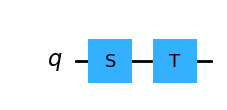

In [28]:

qc.t(0)

qc.draw('mpl')



Resulting State Vector after T gate(in LaTeX notation):


<IPython.core.display.Latex object>


Resulting State Vector after T gate(on Q-Sphere):


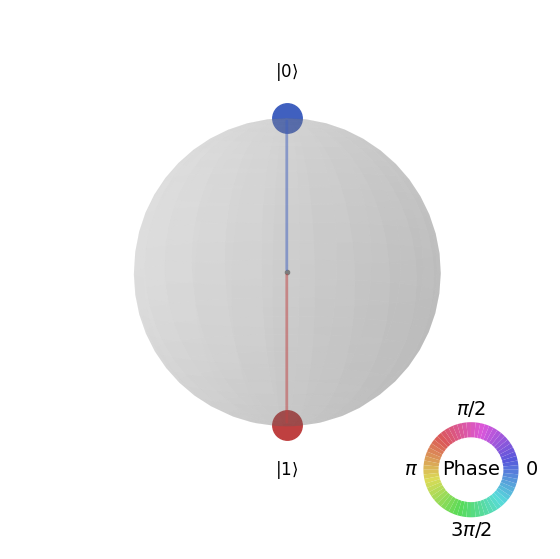


Resulting State Vector after T gate(on Bloch Sphere):


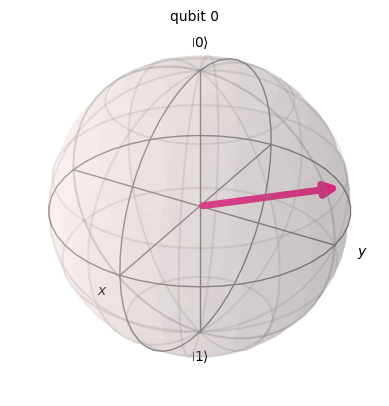

In [29]:
u_final = u_init.evolve(qc)
print("\n\033[1mResulting State Vector after T gate(in LaTeX notation):\033[0m".ljust(50))
display(u_final.draw('latex'))

print("\n\033[1mResulting State Vector after T gate(on Q-Sphere):\033[0m".ljust(50))
display(u_final.draw('qsphere'))

print("\n\033[1mResulting State Vector after T gate(on Bloch Sphere):\033[0m".ljust(50))
display(u_final.draw('bloch'))

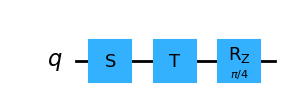

In [30]:

qc.rz(np.pi/4, 0)

qc.draw('mpl')


Resulting State Vector after Rz gate(in LaTeX notation):


<IPython.core.display.Latex object>


Resulting State Vector after Rz gate(on Q-Sphere):


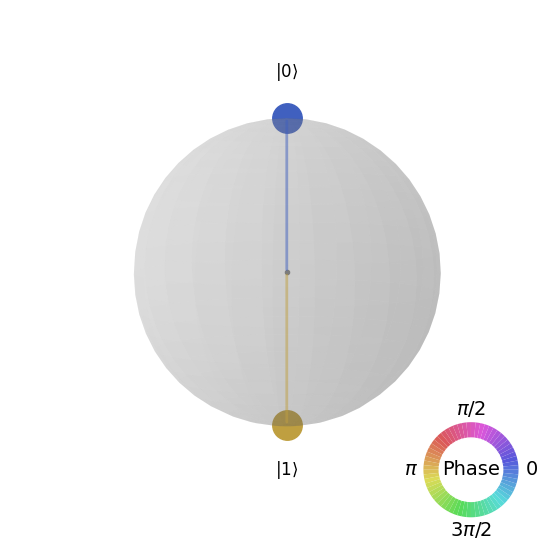


Resulting State Vector after Rz gate(on Bloch Sphere):


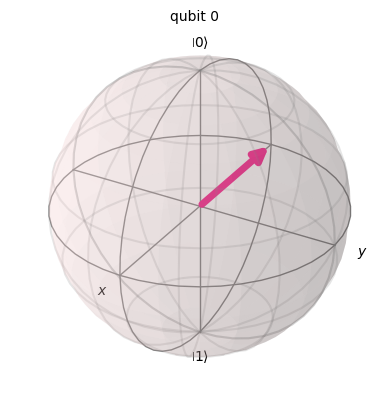

In [31]:
u_final = u_init.evolve(qc)
print("\n\033[1mResulting State Vector after Rz gate(in LaTeX notation):\033[0m".ljust(50))
display(u_final.draw('latex'))

print("\n\033[1mResulting State Vector after Rz gate(on Q-Sphere):\033[0m".ljust(50))
display(u_final.draw('qsphere'))

print("\n\033[1mResulting State Vector after Rz gate(on Bloch Sphere):\033[0m".ljust(50))
display(u_final.draw('bloch'))

### Observation : The |+> state becomes |-> i.e., rotates by 180 degree around z-axis.

In [32]:
shots = 1024

In [33]:
statistics_before = u_init.sample_counts(shots)
statistics_after = u_final.sample_counts(shots)
possible_outcomes = ['0', '1']
full_statistics = {outcome: statistics_after.get(outcome, 0) for outcome in possible_outcomes}
categories = list(full_statistics.keys())
values = list(full_statistics.values())

In [34]:
probs1 = u_init.probabilities()
probs2 = u_final.probabilities()
total_counts = sum(full_statistics.values())
counts = {key: count for key, count in full_statistics.items()}
probabilities = {key: count / total_counts for key, count in full_statistics.items()}

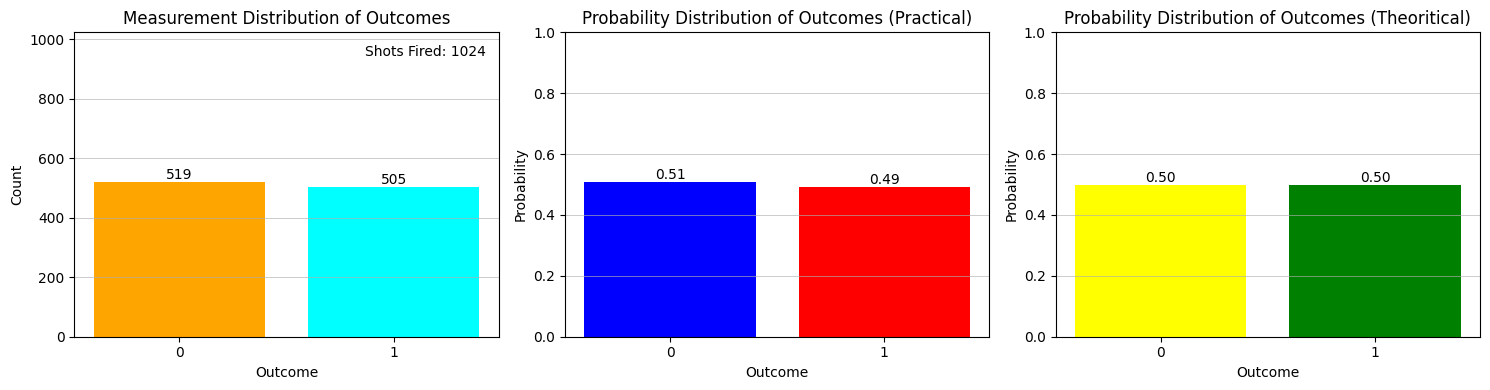

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

bars0 = axs[0].bar(categories, values, color=['orange', 'cyan'])
axs[0].set_xlabel('Outcome')
axs[0].set_ylabel('Count')
axs[0].set_title('Measurement Distribution of Outcomes')
axs[0].grid(True,  axis='y', linestyle='-', linewidth=0.5, alpha=0.9)
axs[0].set_ylim(0, shots)
for bar in bars0:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', ha='center', va='bottom', fontsize=10)

custom_legend = [
    mpatches.Patch(color='none', label=f'Shots Fired: {shots}')
]
axs[0].legend(handles=custom_legend, frameon=False)

bars1 = axs[1].bar(probabilities.keys(), probabilities.values(), color=['blue', 'red'])
axs[1].set_xlabel('Outcome')
axs[1].set_ylabel('Probability')
axs[1].set_title('Probability Distribution of Outcomes (Practical)')
axs[1].grid(True,  axis='y', linestyle='-', linewidth=0.5, alpha=0.9)
axs[1].set_ylim(0, 1)
for bar in bars1:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

bars2 = axs[2].bar(possible_outcomes, probs2, color=['yellow', 'green'])
axs[2].set_xlabel('Outcome')
axs[2].set_ylabel('Probability')
axs[2].set_title('Probability Distribution of Outcomes (Theoritical)')
axs[2].grid(True, axis='y', linestyle='-', linewidth=0.5, alpha=0.9)
axs[2].set_ylim(0, 1)
for bar in bars2:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()  
plt.show()
